This is the Challenge Problem for Tennis stats from Code Academy. <br><br>

Challenge problems from Code Academy do not contain guidance the same way that other projects do. Instead, I was simply given this data set and asked to draw my own conclusions using what I had learned in the Regression section of the course.Code academy got the data from here: https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals

In [1]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#importing csv as dataframe
df = pd.read_csv("tennis_stats.csv")

In [3]:
#looking at column headers/types
df.dtypes

Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object

In [4]:
#Wanted to get an idea of a baseline for wins
df['Wins'].describe()

count    1721.000000
mean        7.876816
std        10.183716
min         0.000000
25%         0.000000
50%         3.000000
75%        13.000000
max        48.000000
Name: Wins, dtype: float64

Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?

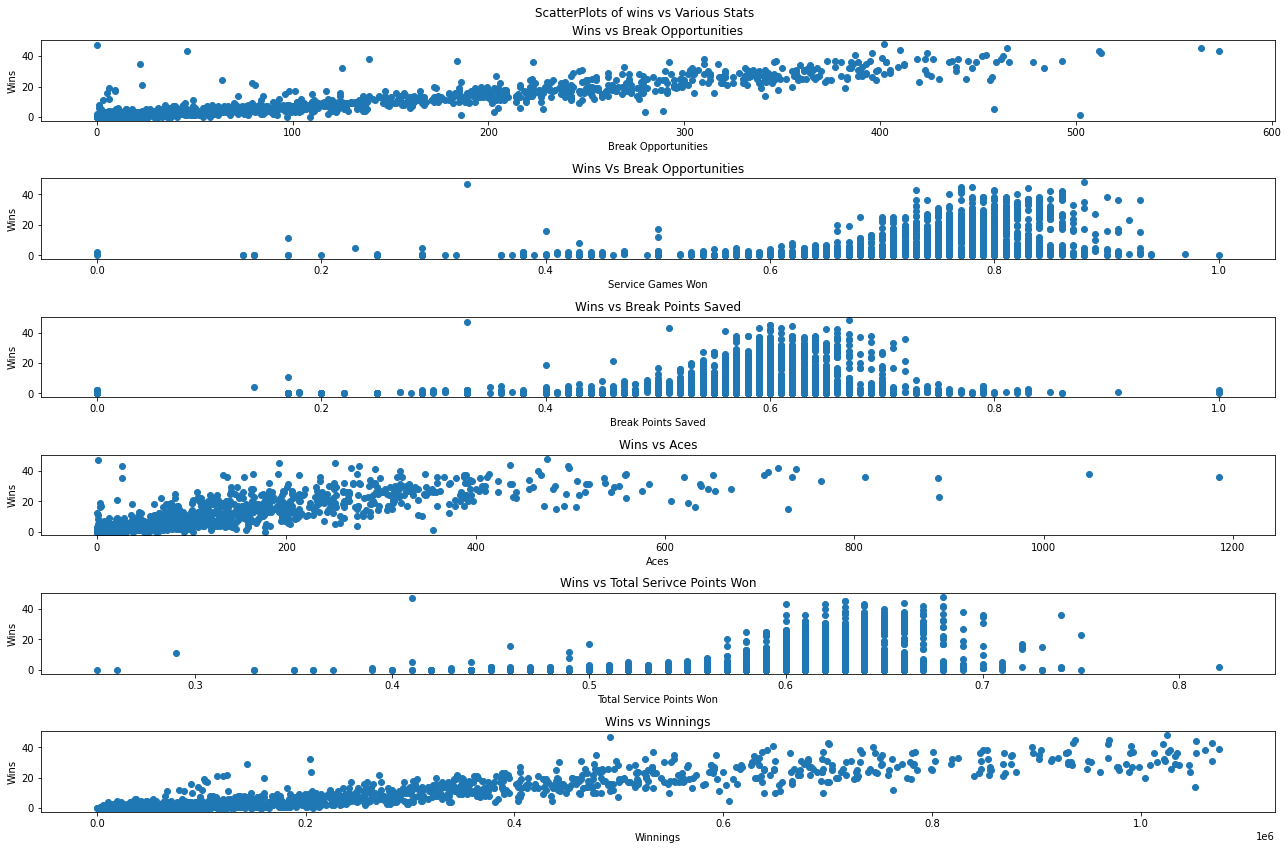

In [5]:
#creating a figure to house some of my sample scatters
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,figsize=(18,12))
fig.figsize = (20,10)
fig.suptitle('ScatterPlots of wins vs Various Stats')
#first plot: Break Opportunities
ax1.scatter(df.BreakPointsOpportunities,df.Wins)
ax1.set_title("Wins vs Break Opportunities")
ax1.set_ylabel('Wins')
ax1.set_xlabel('Break Opportunities')
#Second plot: Service GamesWon
ax2.scatter(df.ServiceGamesWon,df.Wins)
ax2.set_title("Wins Vs Break Opportunities")
ax2.set_ylabel('Wins')
ax2.set_xlabel('Service Games Won')
#Return games won 
ax3.scatter(df.BreakPointsSaved,df.Wins)
ax3.set_title("Wins vs Break Points Saved")
ax3.set_ylabel('Wins')
ax3.set_xlabel('Break Points Saved')
#Aces 
ax4.scatter(df.Aces,df.Wins)
ax4.set_title("Wins vs Aces")
ax4.set_ylabel('Wins')
ax4.set_xlabel('Aces')
#total Service Points won
ax5.scatter(df.TotalServicePointsWon,df.Wins)
ax5.set_title("Wins vs Total Serivce Points Won")
ax5.set_ylabel('Wins')
ax5.set_xlabel('Total Service Points Won')
#total Winnings
ax6.scatter(df.Winnings,df.Wins)
ax6.set_title("Wins vs Winnings")
ax6.set_ylabel('Wins')
ax6.set_xlabel('Winnings')
ax6.set_xticks(range(0,1000001,200000))
fig.tight_layout()

Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, split your data into training and test datasets so that you can evaluate your model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

In [14]:
#I chose to do Aces because Aces are cool and fun, but I'm curuous to see if they really matter towards winning
#Setting up my x value as Aces and Y Value as wins as two separate arrays
Aces = df['Aces']
Wins = df['Wins']
#Setting up train/test ratio
Aces_train, Aces_test, Aces_Wins_train, Aces_Wins_test = train_test_split(Aces, Wins, train_size = 0.8)
#setting up regression for train group
Aces_model = LinearRegression()
#Creating a model by finding a fit from my training groups
Aces_model.fit(Aces_train,Aces_Wins_train)
#Testing the model by running the score method using my test groups. .7 is considered ok,
#so it seems Aces shouldn't be considered a great indicator of wins, although there is a correlation
Aces_model.score(Aces_test,Aces_Wins_test)

0.6903195378546333

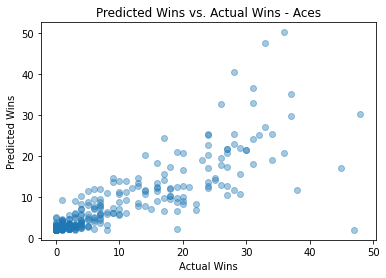

<Figure size 432x288 with 0 Axes>

In [64]:
#Predicting wins based on this model
prediction_aces = Aces_model.predict(Aces_test)
#Plotting predicted wins vs actual wins
plt.scatter(Aces_Wins_test,prediction_aces, alpha=0.4)
plt.title('Predicted Wins vs. Actual Wins - Aces')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()
plt.clf()

Create a few more linear regression models that use one feature to predict one of the outcomes. Which model that you create is the best?

In [16]:
#For my next choice, I did Winnings, since it seems reasonable people with alot of winnings have won many games
#Setting up my x value as Aces and Y Value as wins as two separate arrays
Winnings = df['Winnings']
Wins = df['Wins']
#Setting up train/test ratio
Winnings_train, Winnings_test, Winnings_Wins_train, Winnings_Wins_test = train_test_split(Winnings, Wins, train_size = 0.8)
#setting up regression for train group
winnings_model = LinearRegression()
#Creating a model by finding a fit from my training groups
winnings_model.fit(Winnings_train,Winnings_Wins_train)
#Testing the model by running the score method using my test groups. .7 is considered ok,
#so it seems Winnings should be an indicator indicator of wins
winnings_model.score(Winnings_test,Winnings_Wins_test)

0.8213989378556424

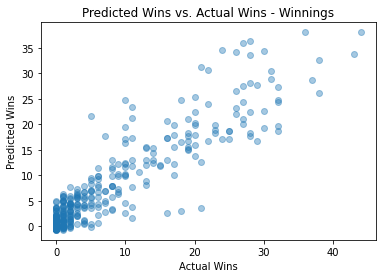

<Figure size 432x288 with 0 Axes>

In [62]:
#Establihsing predicted wins
prediction_winnings = winnings_model.predict(Winnings_test)
#Creating plot comparing predicted wins to actual wins
plt.scatter(Winnings_Wins_test,prediction_winnings, alpha=0.4)
plt.title('Predicted Wins vs. Actual Wins - Winnings')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()
plt.clf()

Create a linear regression model that use two features to predict yearly earnings. Which set of two features results in the best model?

In [36]:
#Starting with the two that I made my single plots on - Aces and Winnings
#creating my array with those two as the x values
aces_winnings = df[['Aces','Winnings']]
#keeping wins as y values but restating here for ease of reference
Wins = df['Wins']
#Setting up train/test ratio
AcesWinnings_train, AcesWinnings_test, AcesWinnings_Wins_train, AcesWinnings_Wins_test = train_test_split(aces_winnings,\
                                                                                             Wins, train_size = 0.8)
#setting up regression for train group
aceswinnings_model = LinearRegression()
#Creating a model by finding a fit from my training groups
aceswinnings_model.fit(AcesWinnings_train,AcesWinnings_Wins_train)
#Testing the model by running the score method using my test groups. .7 is considered ok,
#so it seems Aces + Winnings should be an indicator indicator of wins
aceswinnings_model.score(AcesWinnings_test,AcesWinnings_Wins_test)

0.8160935352178066

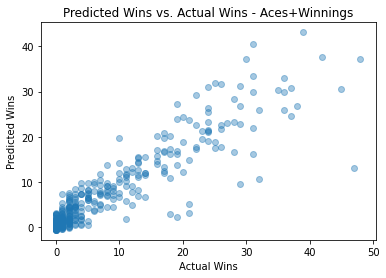

<Figure size 432x288 with 0 Axes>

In [61]:
#predicting wins based on lines of best fit
prediction_aceswinnings = aceswinnings_model.predict(AcesWinnings_test)
#plotting predicted wins vs actual wins
plt.scatter(AcesWinnings_Wins_test,prediction_aceswinnings,alpha=0.4)
plt.title('Predicted Wins vs. Actual Wins - Aces+Winnings')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()
plt.clf()

Create a few linear regression models that use multiple features to predict yearly earnings. Which set of features results in the best model?

Head to the Codecademy forums and share your set of features that resulted in the highest test score for predicting your outcome. What features are most important for being a successful tennis player?

In [56]:
# select features and value to predict
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',\
               'SecondServePointsWon','Aces','BreakPointsConverted',\
               'BreakPointsOpportunities','ReturnGamesWon',\
               'ReturnPointsWon','ServiceGamesWon','TotalPointsWon','TotalServicePointsWon','Winnings']]
outcomes = df[['Wins']]

# train, test, split the data
features_train, features_test, outcomes_train, outcomes_test = train_test_split(features, outcomes, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train,outcomes_train)

# score model on test data
model.score(features_test,outcomes_test)

0.9206945508140875

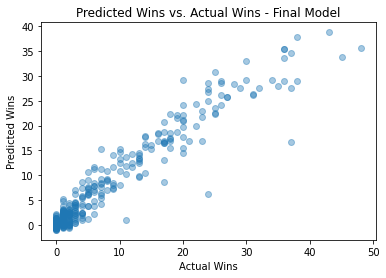

<Figure size 432x288 with 0 Axes>

In [57]:
# make predictions with model
outcomes_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(outcomes_test,outcomes_prediction, alpha=0.4)
plt.title('Predicted Wins vs. Actual Wins - Final Model')
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.show()
plt.clf()